## Final Project Submission

Please fill out:
* Student name: JACKSON MAINA
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: NOAH KANDIE
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

![MOVIES](studios.jpg "Title")


### OVERVIEW


With sudden increase in original film production in mega companies, Microsoft wants to get an in-depth understanding of the movie industries to help her determine if it’s a business they can venture. I used the return on investment as a measure to gauge the profitability of particular movies, looked into most popular publisher and rating and also used production budget against domestic gross to help determine the correction of the two output and also how production budget influence movie output in term of sales.


### BUSINESS PROBLEM

The potential problem that microsoft has is basically to determine if they should venture into the movie industry and just get to basically understand the key determiners of the market that influence good outcome in term of sale and basically helping them understand the success of a movie is basically determine by not only common factor like gross income  but things also like the publisher so Microsoft has to position itself well to beat key players like Amazon and Netflix.
I used these key analysis to help them understand the problem
1.Original language
2.ROI and Production Budget
3.Publishers and Rating 
It's important for Microsoft to carefully consider both the ROI potential and the publishers they work with in order to make informed decisions about their venture into original movie content.


### DATA UNDERSTANDING

The potential problem that microsoft has is basically to determine if they should venture into the movie industry and just get to basically understand the key determiners of the market that influence good outcome in term of sale and  success of a movie is basically determine by not only common factor like gross income  but things also like the publisher so Microsoft has to position itself well to beat key players like Amazon and Netflix.I used below key analysis to help them understand the problem
1.Return On Investement(ROI) i will get this analyses from the movie budget dataset
2.Production Budget 
3.Publishers and Ratings
It's important for Microsoft to carefully consider both the ROI potential and the publishers they work with in order to make informed decisions about their venture into original movie content.


In [2]:
#imported the necessary tool for data cleaning and analyses.
import pandas as pd
import sqlite3
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Get to answer original language influence on the movie views 

In [3]:
#import TMDB movie dataset
movies =pd.read_csv('tmdb.movies.csv.gz',index_col = 0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
#having gotten the data,an overview of the columns shows the following (genre id,id,original language,original title,popularity,release date,title,vote average and vote count).I will clean the above data and get to get more insight on the original language and views based on the production language.

In [5]:
#get to understanding datatype i will be using
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [6]:
#get to see statistical ananlysis of the data
movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [7]:
#get to see if there is null values in the data
movies.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [8]:
#get to see the key values in the dataset
movies.keys()

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

<AxesSubplot:>

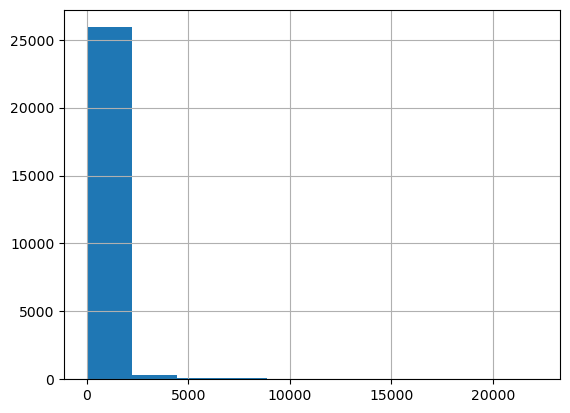

In [9]:
#get to create an histogram for the vote count column to have an insight of how it is distributed
movies['vote_count'].hist()

In [10]:
#get to get in the vote count column those above 20000
movies[movies['vote_count']>20000]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175


In [11]:
#above shows the two movies that had a value_count of more than 20000

In [12]:
#the correlation btw vote_average and vote_count is weak positive correlation
movies_corr =movies[['vote_average', 'vote_count']].corr()
movies_corr

,vote_average,vote_count
vote_average,1.00000,0.08637
vote_count,0.08637,1.00000


<AxesSubplot:>

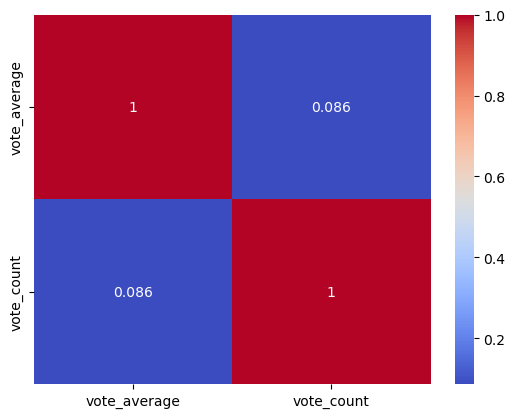

In [13]:
# the seaborn graph assist to clearly show the correlation of the two and as per the graph its a weak as it is below 0.2
sns.heatmap(movies_corr, cmap ='coolwarm', annot =True)

In [14]:
#another insight is the relation of the movies and the languages used and mostly the audience prefer english as shown below
movies['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

In [15]:
#the correlation btw vote_average and popularity is weak positive correlation
movies_pop =movies[['popularity', 'vote_average']].corr()
movies_pop

,popularity,vote_average
popularity,1.000000,0.065273
vote_average,0.065273,1.000000


<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

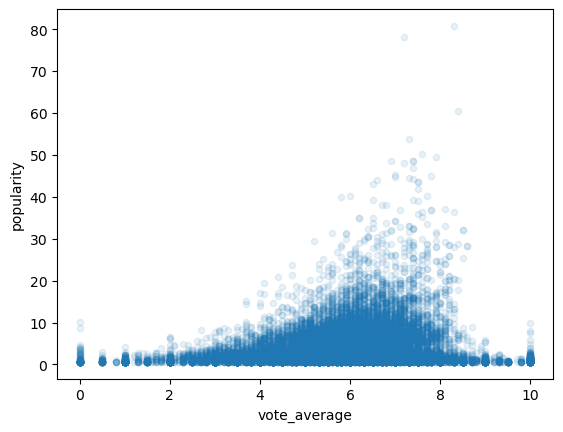

In [16]:
#create a scatterplot for the vote average and popularity 
movies.plot.scatter(x ='vote_average',y= 'popularity', alpha= .1)

### 2.Analyse the TN dataset to get more insight on ROI 

In [17]:
#import movie budget dataset
movie_budgets =pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [18]:
#get to see the statistical analyses of the data like mean 
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [19]:
#get to see datatype 
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [20]:
#get to see if the data has null values
movie_budgets.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [21]:
#movie_budgets_corr =movie_budgets[['domestic_gross','foreign_gross']].corr()
#movie_budgets_corr

In [22]:
#get to remove the $ and '' values in the data to help do further statistical analyses in the data
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'].str[1:].str.replace(',', ''))
movie_budgets['production_budget'] =pd.to_numeric(movie_budgets['production_budget'].str[1:].str.replace(',', ''))
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'].str[1:].str.replace(',', ''))
movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [23]:
#get to calculate the ROI by substracting production budget from the domestic gross
#i have calculated the return of investment based on the difference of domestic gross and production budget
movie_budgets['ROI'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


Text(0.5, 1.0, 'production_budget vs domestic_gross')

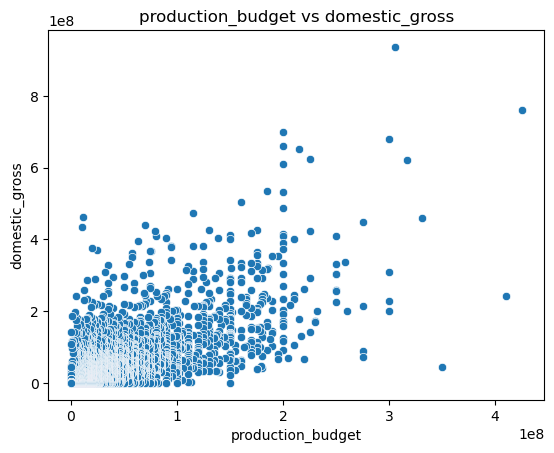

In [24]:
#create a scatterplot 
sns.scatterplot(data=movie_budgets,x='production_budget', y='domestic_gross')
plt.title('production_budget vs domestic_gross')

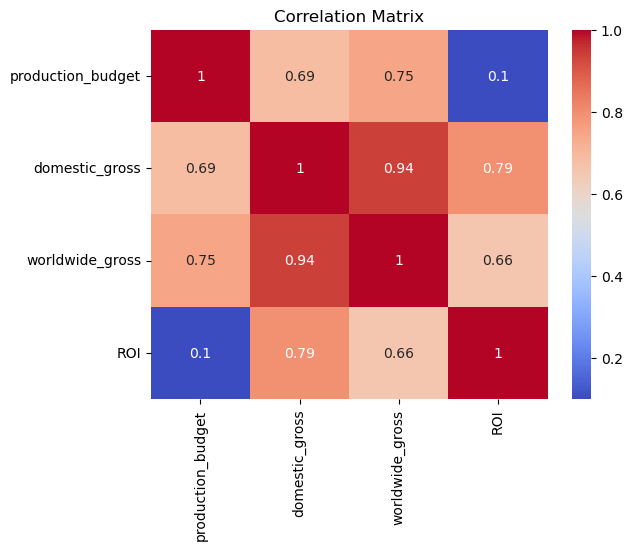

In [25]:
# Compute the correlation matrix
corr = movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross', 'ROI']].corr()

# Create heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Get the movie with the highest ROI
highest_ROI_movie = movie_budgets.loc[movie_budgets['ROI'].idxmax(), 'movie']
print(f"Highest ROI movie: {highest_ROI_movie}")

Highest ROI movie: Star Wars Ep. VII: The Force Awakens


In [27]:
# Get the movie with the highest domestic gross
highest_domestic_gross_movie = movie_budgets.loc[movie_budgets['domestic_gross'].idxmax(), 'movie']
print(f"Highest domestic gross movie: {highest_domestic_gross_movie}")

Highest domestic gross movie: Star Wars Ep. VII: The Force Awakens


In [28]:
#this two previous finds supports my correlation matrix on the correction between ROI and Domestic_gross that had a strong positive correlation in that as domestic gross increase ROI increases.

In [29]:
highest_production_budget_movie = movie_budgets.loc[movie_budgets['production_budget'].idxmax(), 'movie']
print(f"Highestproduction budget movie: {highest_production_budget_movie}")

Highestproduction budget movie: Avatar


In [30]:
#avatar had the highest prouction budget meaning production budget doesnt mean more profitability

In [31]:
#Determine the movies that made losses in terms of ROI
# Filter the rows where ROI is negative
negative_ROI_movies = movie_budgets.loc[movie_budgets['ROI'] < 0, 'movie']

# Print the movies with negative ROI
print(negative_ROI_movies)

1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
8                                    Justice League
9                                           Spectre
11                          Solo: A Star Wars Story
                           ...                     
5772                                      Newlyweds
5776                                The Mongol King
5777                                         Red 11
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
Name: movie, Length: 3105, dtype: object


In [32]:
# Sort the DataFrame by ROI in descending order
sorted_movie = movie_budgets.sort_values('ROI', ascending=False)

# Get the top 10 movies with the highest ROI
top_10_ROI_movies = sorted_movie.head(10)

# Display the top 10 movies
print(top_10_ROI_movies[['movie', 'ROI']])

                                     movie        ROI
5     Star Wars Ep. VII: The Force Awakens  630662225
41                           Black Panther  500059566
42                                 Titanic  459363944
3464          Star Wars Ep. IV: A New Hope  449998007
33                          Jurassic World  437270625
3525             ET: The Extra-Terrestrial  424610554
43                           Incredibles 2  408581744
26                            The Avengers  398279547
6                   Avengers: Infinity War  378815482
692                                Shrek 2  371226247


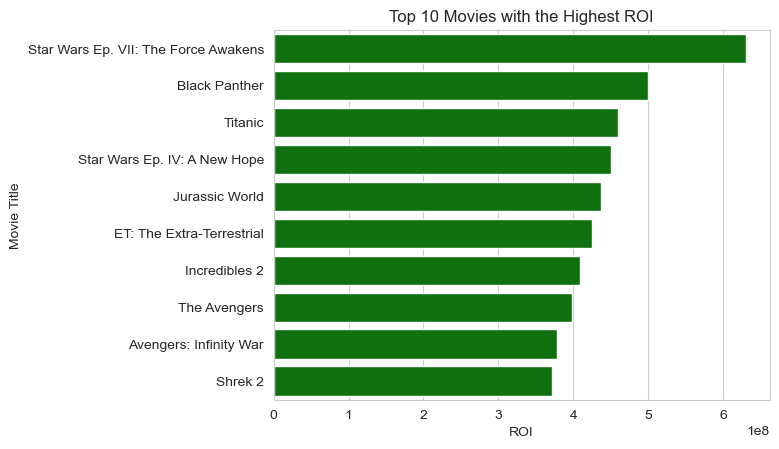

In [33]:
# Create a horizontal bar chart of the top 10 movies with the highest ROI
sns.set_style('whitegrid')
sns.barplot(data=top_10_ROI_movies, x='ROI', y='movie', color='green')
plt.xlabel('ROI')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Highest ROI')

# Display the plot
plt.show()

### Identify the movies with highest ROI for the last 10 years

In [34]:
#identify the movies with highest ROI for the last 10 years having resetted the release year as the index
#reset the release_date column as a datetime and set it as the index column
# Convert the release_date column to datetime and set it as index
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.set_index('release_date', inplace=True)

# Filter the DataFrame to only include the rows from the past 10 years
ten_years_ago = pd.to_datetime('today') - pd.DateOffset(years=10)
filtered_df = movie_budgets.loc[movie_budgets.index >= ten_years_ago]

# Sort the DataFrame by ROI in descending order and retrieve the top 10 movies
sorted_df = filtered_df.sort_values('ROI', ascending=False)
top_10_ROI_movies = sorted_df.head(10)

# Print out the top 10 movies with their ROI values
print(top_10_ROI_movies[['movie', 'ROI']])

                                             movie        ROI
release_date                                                 
2015-12-18    Star Wars Ep. VII: The Force Awakens  630662225
2018-02-16                           Black Panther  500059566
2015-06-12                          Jurassic World  437270625
2018-06-15                           Incredibles 2  408581744
2018-04-27                  Avengers: Infinity War  378815482
2017-03-17                    Beauty and the Beast  344014165
2016-12-16            Rogue One: A Star Wars Story  332177324
2017-12-20          Jumanji: Welcome to the Jungle  314508916
2016-02-12                                Deadpool  305070709
2017-12-15       Star Wars Ep. VIII: The Last Jedi  303181382


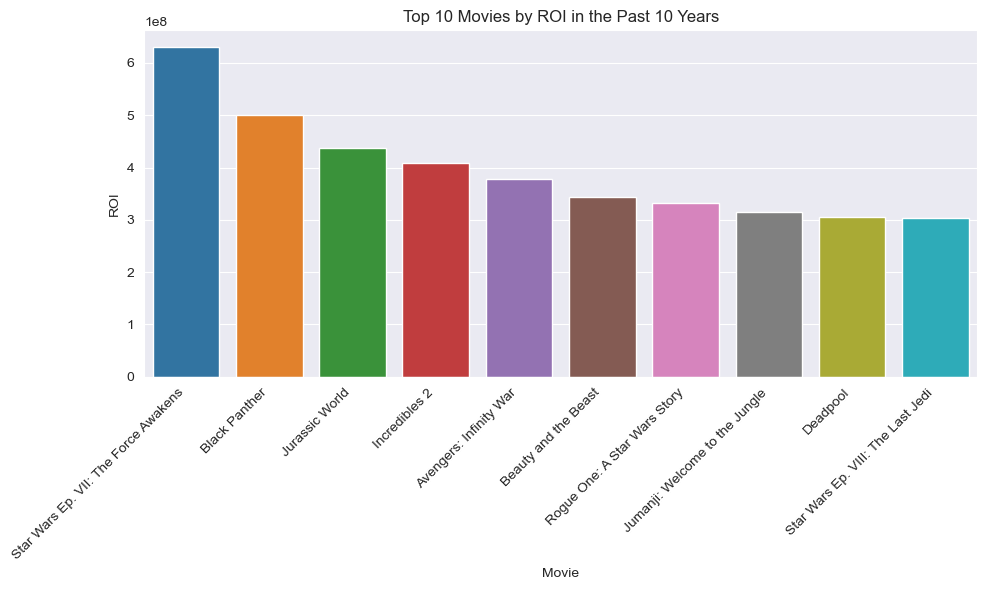

In [35]:
# Create a bar plot of the top 10 movies by ROI
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='movie', y='ROI', data=top_10_ROI_movies)
plt.title('Top 10 Movies by ROI in the Past 10 Years')
plt.xlabel('Movie')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.Analyse the review dataset to get an insight of the publisher and rating

In [36]:
review = pd.read_csv('reviews.tsv' ,sep ='\t',encoding = 'latin')
review


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [37]:
review['publisher'].unique()

array(['Patrick Nabarro', 'io9.com', 'Stream on Demand', ...,
       'The Big Issue (Australia)', 'The Jacobin', 'OZY'], dtype=object)

In [38]:
review['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [39]:
#The ratings appear to be in different formats
#such as letter grades (A+, A, B-, etc.)
# percentages (e.g. 80%)
#fractions (e.g. 3/5), and
#even non-numeric characters (such as 'N' and 'T').


In [40]:
#create a function that takes each rating as an input
#checks its format, 
#converts it to a numerical rating on a scale of 1 to 10. 
def convert_rating(rating):
    try:
        if '/' in rating:
            numer, denom = rating.split('/')
            return round(int(numer)/int(denom)*10, 1)
        elif '-' in rating:
            left, right = rating.split('-')
            return round((int(left) + int(right))/2, 1)
        elif rating in ['N', 'R', 'T']:
            return None
        else:
            return float(rating)
    except:
        return None

In [41]:
#apply this function to each element in the ratings column using the apply() method.
# create a new column showing the ratings in numeric.
# Identify the publisher who had the highest rating.
review['numeric_rating'] = review['rating'].apply(convert_rating)
review

,id,review,rating,fresh,critic,top_critic,publisher,date,numeric_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6.0
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",NaN
...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",NaN
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",2.0
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",4.0
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",NaN


In [42]:
#calculate the highest rated publisher
highest_rated_publisher = review.groupby('publisher')['numeric_rating'].mean().sort_values(ascending=False).index[0]
print("The highest rated publisher is:", highest_rated_publisher)

The highest rated publisher is: FilmFour.com


In [43]:
#get the top ten publishers
top_ten_publishers = review.groupby('publisher')['numeric_rating'].mean().sort_values(ascending=False).head(10)
print(top_ten_publishers)

publisher
FilmFour.com                               10.0
Filmspotting                               10.0
Daily Journal (Kankakee, IL)               10.0
Black Star News                            10.0
Providence American                        10.0
Martha's Vineyard Times (Massachusetts)    10.0
FF2 Media                                  10.0
Sly Fox                                    10.0
Attitude                                   10.0
Afro-American                              10.0
Name: numeric_rating, dtype: float64


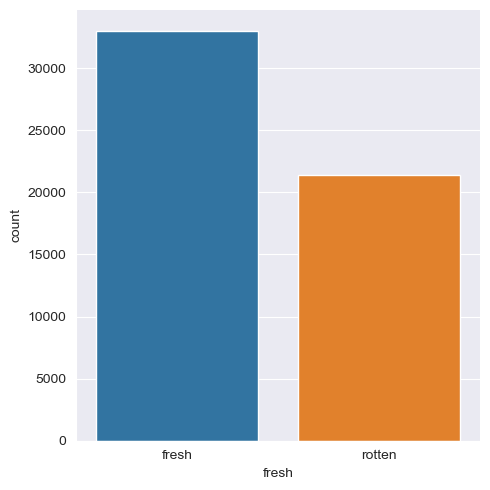

In [44]:
# Explore fresh distribution 
sns.catplot(x="fresh", kind="count", data=review)

In [45]:
#The dataset has more fresh movies as compared to rotten. 
#movies with a score above 70% are considered to be fresh while movies with a score of 59% or lower as considered to as rotten

### CONCLUSIONS

The three key factor I used for analysis show that ROI is important and this is basically determined by production cost against domestic gross and also the language of the movie will influence production and English is the most preferred movie type as it attracts more audience hence mostly watched and lastly publishers and their rating is a key factor as they will assist push for sales and good rating. Top known publisher in the industry  plays a key role in pushing for movies sales.

### RECOMMENDATION

Consider investing in movies with higher production budgets: Since there is a positive correlation between production budget and domestic gross, investing in movies with higher production budgets may be more likely to yield higher returns. However, it's important to keep in mind that higher production budgets also come with higher risks.

Look for movies with good ratings: Movies with good ratings, especially those from top publishers, may be more likely to attract audiences and generate higher ticket sales. Investing in movies with good ratings can help minimize the risk of a box office flop.

Diversify your investments: While there is a positive correlation between production budget and domestic gross, it's important to diversify your investments to minimize risk. Investing in a variety of movies with different production budgets, genres, and ratings can help spread out the risk and increase the likelihood of a successful investment portfolio.

Consider the overall market trends: It's important to consider the overall market trends and consumer preferences when making investment decisions in the movie industry. For example, if streaming services are becoming more popular, it may be wise to invest in movies that have the potential to perform well on streaming platforms. Keeping up with the latest market trends can help you make informed investment decisions.